In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class channel:
    """The channel class represents the physical voltage inputs for the SLIM instrument.
    The channel class represents a MIPS input."""
    
    def __init__(self, description, voltage):
        self.description = description
        self.voltage = voltage
    
    def set_voltage(self, new_voltage):
        self.voltage = new_voltage

class region:
    """The region class represents the space between two voltage inputs. 
    Over a defined length, the two voltage inputs create the separation field."""
    def __init__(self, description, length, field_strength):
        self.description = description
        self.length = length
        self.field_strength = field_strength
        
    def set_length(self, new_length):
        self.length = new_length
        
    def set_field_strength(self, new_field_strength):
        self.field_strength = new_field_strength
        
    def voltage_drop(self):
        voltage_drop = self.field_strength * self.length
        return voltage_drop

# Define channels

Naming conventions:
 - Tee module voltages will start with module location - M1, M7, M8 - except for SLIM1 dc out and SLIM2 dc in
 - 'SLIM1' and 'SLIM2' will be used to keep consistent with SLIM Pickens voltage keys
 - 'orth' will be used for orthogonal paths of tee modules


In [3]:
# Define the region and channels of the CIF
CIF = region('CIF', 10.87, 0)
CSSO = channel('CCSO', 0)
CIF_CL = channel('CIFCL', 0)
CIF_dc_out = channel('CIF_dc_out', 0)
CIF_dc_in = channel('CIF_dc_in', 0)

# Define the field strengths and voltage drops of the CIF
CSSO.set_voltage(-110)
CIF.set_field_strength(6)
CIF_CL_to_CCSO_drop = 3
CIF_to_CIF_CL_drop = 2
CIF.set_field_strength(6)

# Define the region and channels of SLIM 2
SLIM2 = region('SLIM2', 38.1, 0)
SLIM2_dc_in = channel('SLIM2_dc_in', 0)
SLIM2_dc_out = channel('SLIM2_dc_out', 0)
M8_sg = channel('Module 8 switch guard', 0)

#Define the field strengths and voltage drops
SLIM2.set_field_strength(4)
SLIM2_to_CIF_drop = 5
M8_sg_bias = 4

#Define channels in the interface region
M8_orth_out = channel('M8_orth_out', 0)
M8_orth_in = channel('M8_orth_in', 0)
M8_orth = region('M8_orth', 3.5052, 3.75)
SLIM2_8M_interface = 0

#Define voltage drops
M8_orth_to_SLIM2 = 1

#Define channels in the interface region
M7_orth_out = channel('M7_orth_out', 0)
M7_orth_in = channel('M7_orth_in', 0)
M7_orth = region('M7_orth', 3.5052, 3.75)
SLIM1_7M_interface = 0

#Define drops in the region
M7_to_M8_drop = 0

#Define channels and regions
SLIM1_dc_out = channel('SLIM1_dc_out', 0)
SLIM1_dc_in = channel('SLIM1_dc_in', 0)
M7_sg = channel('Module 7 switch guard', 0)
SLIM1 = region('SLIM1', 45.72, 4)

#Define interface and voltage drops
SLIM1_to_7M_orth_drop = 0
M7_sg_bias = 5

In [4]:
EMPTY = channel('Empty Channel', 0)

# MIPS dictionaries

In [5]:
Falkor_channels = {
    'channel_1' : CIF_dc_in,
    'channel_2' : CIF_dc_out,
    'channel_3' : CIF_CL
}

In [6]:
MIPS_2 = {
    'channel_1' : EMPTY,
    'channel_2' : EMPTY,
    'channel_3' : EMPTY,
    'channel_4' : EMPTY,
    'channel_5' : EMPTY,
    'channel_6' : M7_sg,
    'channel_7' : M7_orth_in,
    'channel_8' : M7_orth_out,
    'channel_9' : SLIM1_dc_out,
    'channel_10' : M8_sg,
    'channel_11' : M8_orth_in,
    'channel_12' : M8_orth_out,
    'channel_13' : SLIM2_dc_in,
    'channel_14' : SLIM2_dc_out,
    'channel_15' : EMPTY, 
    'channel_16' : EMPTY,
}

In [7]:
MIPS_1 = {
    'channel_1' : EMPTY,
    'channel_2' : EMPTY,
    'channel_3' : EMPTY,
    'channel_4' : EMPTY,
    'channel_5' : EMPTY,
    'channel_6' : EMPTY,
    'channel_7' : EMPTY,
    'channel_8' : EMPTY,
    'channel_9' : EMPTY,
    'channel_10' : EMPTY,
    'channel_11' : SLIM1_dc_in,
    'channel_12' : EMPTY,
    'channel_13' : EMPTY,
    'channel_14' : EMPTY,
    'channel_15' : EMPTY, 
    'channel_16' : EMPTY,
}

# Set Voltages

In [ ]:
# #Set CIF voltages
# CIF_CL.set_voltage(CSSO.voltage + CIF_CL_to_CCSO_drop)
# CIF_dc_out.set_voltage(CIF_CL.voltage + CIF_to_CIF_CL_drop)
# CIF_dc_in.set_voltage(CIF_dc_out.voltage + (CIF.voltage_drop()))

# #Set SLIM2 voltages
# SLIM2_dc_out.set_voltage(CIF_dc_in.voltage + SLIM2_to_CIF_drop)
# SLIM2_dc_in.set_voltage(SLIM2_dc_out.voltage + (SLIM2.field_strength * SLIM2.length))
# SLIM2_8M_interface = (SLIM2_dc_in.voltage - (SLIM2.voltage_drop() * (25.5/250)))
# M8_sg.set_voltage(SLIM2_8M_interface + M8_sg_bias)

# #Set 8M voltages
# M8_orth_out.set_voltage(SLIM2_8M_interface + M8_orth_to_SLIM2)
# M8_orth_in.set_voltage(M8_orth_out.voltage + M8_orth.voltage_drop())

# #Set 7M voltages
# M7_orth_out.set_voltage(M8_orth_in.voltage + M7_to_M8_drop)
# M7_orth_in.set_voltage(M7_orth_out.voltage + M7_orth.voltage_drop())
# SLIM1_7M_interface = M7_orth_in.voltage + SLIM1_to_7M_orth_drop
# M7_sg.set_voltage(SLIM1_7M_interface + M8_sg_bias)

# #Set voltages
# SLIM1_dc_out.set_voltage(SLIM1_7M_interface - SLIM1.voltage_drop()*(25.5/300))
# SLIM1_dc_in.set_voltage(SLIM1_dc_out.voltage + SLIM1.voltage_drop())

In [8]:
def set_voltages():
    #Set CIF voltages
    CIF_CL.set_voltage(CSSO.voltage + CIF_CL_to_CCSO_drop)
    CIF_dc_out.set_voltage(CIF_CL.voltage + CIF_to_CIF_CL_drop)
    CIF_dc_in.set_voltage(CIF_dc_out.voltage + (CIF.voltage_drop()))

    #Set SLIM2 voltages
    SLIM2_dc_out.set_voltage(CIF_dc_in.voltage + SLIM2_to_CIF_drop)
    SLIM2_dc_in.set_voltage(SLIM2_dc_out.voltage + (SLIM2.field_strength * SLIM2.length))
    global SLIM2_8M_interface
    SLIM2_8M_interface = (SLIM2_dc_in.voltage - (SLIM2.voltage_drop() * (25.5/250)))
    M8_sg.set_voltage(SLIM2_8M_interface + M8_sg_bias)

    #Set 8M voltages
    M8_orth_out.set_voltage(SLIM2_8M_interface + M8_orth_to_SLIM2)
    M8_orth_in.set_voltage(M8_orth_out.voltage + M8_orth.voltage_drop())

    #Set 7M voltages
    M7_orth_out.set_voltage(M8_orth_in.voltage + M7_to_M8_drop)
    M7_orth_in.set_voltage(M7_orth_out.voltage + M7_orth.voltage_drop())
    global SLIM1_7M_interface
    SLIM1_7M_interface = M7_orth_in.voltage + SLIM1_to_7M_orth_drop
    M7_sg.set_voltage(SLIM1_7M_interface + M8_sg_bias)

    #Set voltages
    SLIM1_dc_out.set_voltage(SLIM1_7M_interface - SLIM1.voltage_drop()*(25.5/300))
    SLIM1_dc_in.set_voltage(SLIM1_dc_out.voltage + SLIM1.voltage_drop())

In [9]:
set_voltages()

102.07520000000001
129.3642


In [ ]:
SLIM1.set_field_strength(10)

# Plotting

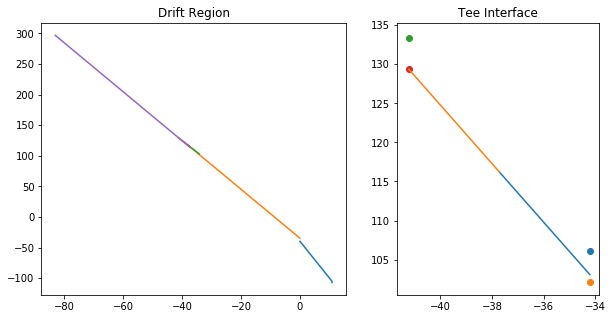

In [10]:
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[3,2]})
f.set_figheight(5)
f.set_figwidth(10)
#full SLIM plot
a0.set_title('Drift Region')
a0.plot([0,10.87,10.87],[CIF_dc_in.voltage,CIF_dc_out.voltage,CIF_CL.voltage])
a0.plot([-38.1,0,], [SLIM2_dc_in.voltage, SLIM2_dc_out.voltage])
a0.plot([-34.2138, -37.719], [M8_orth_out.voltage, M8_orth_in.voltage])
a0.plot([-37.719, -41.2242], [M7_orth_out.voltage, M7_orth_in.voltage])
a0.plot([-37.338, -83.058], [SLIM1_dc_out.voltage, SLIM1_dc_in.voltage])

#tee interface plot
a1.set_title('Tee Interface')
a1.scatter([-34.2138],[M8_sg.voltage])
a1.scatter([-34.2138],[SLIM2_8M_interface])
a1.plot([-34.2138, -37.719], [M8_orth_out.voltage, M8_orth_in.voltage])
a1.plot([-37.719, -41.2242], [M7_orth_out.voltage, M7_orth_in.voltage])
a1.scatter([-41.2242],[M7_sg.voltage])
a1.scatter([-41.2242],[SLIM1_7M_interface])

In [11]:
SLIM1_7M_interface

129.3642